In [9]:
%load_ext autoreload
%autoreload 1

In [10]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

%aimport data_cleaning
%aimport linreg
from data_cleaning import plot_learning_curves
from linreg import LeastSq, GD, SGD

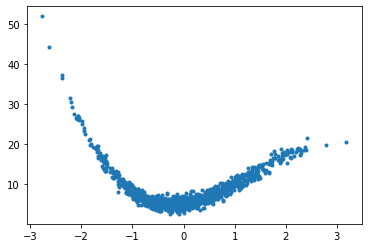

In [11]:
N = 3
M = 1000
X = np.random.randn(M,1)
y = 5 + 2*X + 4*X**2 - X**3 + np.random.randn(M,1)
plt.plot(X,y, '.')
poly_features = PolynomialFeatures(degree=N, include_bias=True)

In [12]:
ls = LeastSq(N)
ls.fit(X, y)
print(ls.theta)

gd = GD(N, eta=0.01)
gd.fit(X,y)
print(gd.theta)

sgd = SGD(N, batch_size=10, t0=0.1)
sgd.fit(X,y)
print(sgd.theta)

[[ 4.98637302]
 [ 1.9649594 ]
 [ 4.01183349]
 [-0.97998163]]
[[ 4.98687157]
 [ 1.95644934]
 [ 4.01130432]
 [-0.97772834]]
[[ 4.49834456]
 [ 1.16484845]
 [ 4.22396366]
 [-0.78241416]]


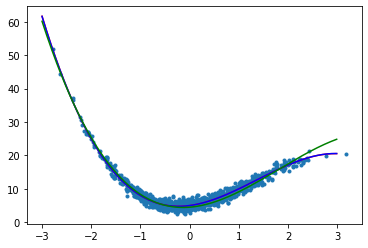

In [13]:
res = 100
X_reg = np.array([[1.0/res * i] for i in range(-3*res, 3*res)])
X_reg_poly = poly_features.fit_transform(X_reg)

y_ls  = X_reg_poly.dot(ls.theta)
y_gd  = X_reg_poly.dot(gd.theta)
y_sgd = X_reg_poly.dot(sgd.theta)

plt.plot(X,y, '.')
plt.plot(X_reg, y_ls, 'red')
plt.plot(X_reg, y_gd, 'blue')
plt.plot(X_reg, y_sgd, 'green')
plt.show()

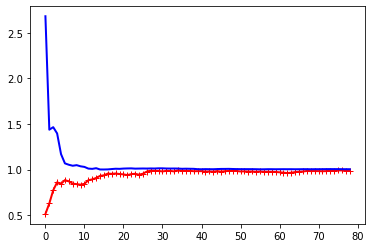

In [14]:
plot_learning_curves(LeastSq(3), X, y, skip=10)

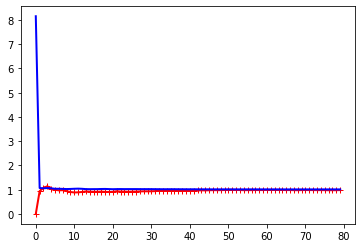

In [15]:
plot_learning_curves(GD(3), X, y, skip=10)

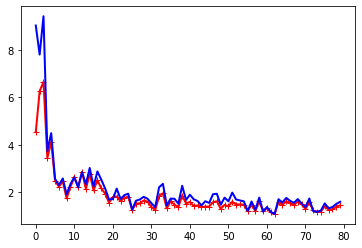

In [16]:
plot_learning_curves(SGD(3, batch_size=10, t0=0.1), X, y, skip=10)